# **Logistic Regression**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# **1) Data Exploration**

**a) Load the dataset and perform exploratory data analysis (EDA).**

In [2]:
df_train=pd.read_csv("/content/Titanic_train.csv")
df_test=pd.read_csv("/content/Titanic_test.csv")
df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True) # these column not important

In [4]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**b) Examine the features, their types, and summary statistics.**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**c**) Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

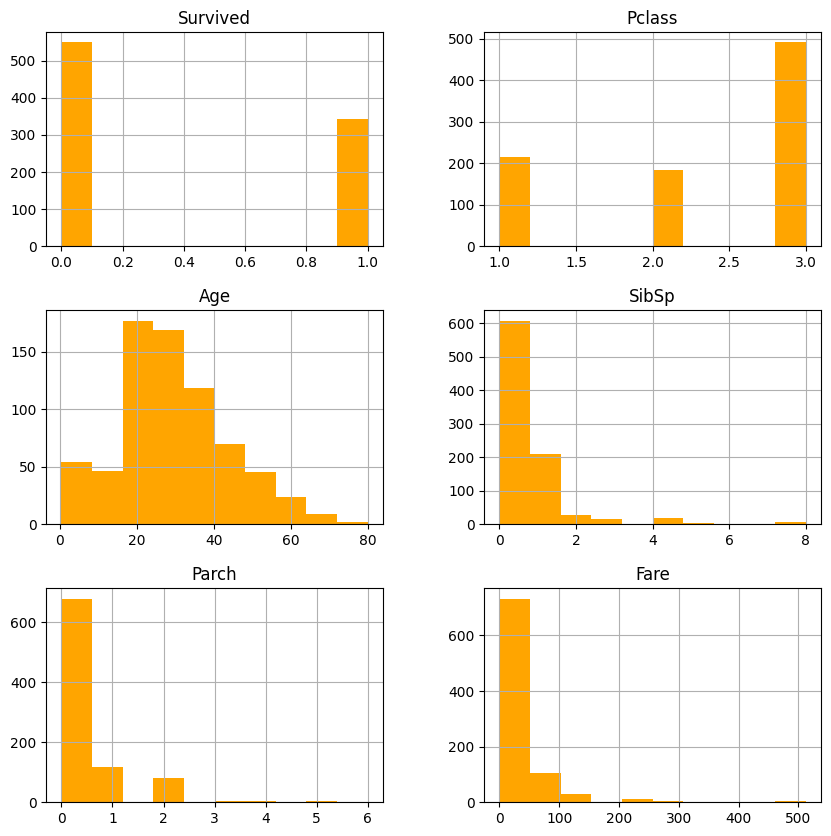

In [7]:
# Histogram of training data
df_train.hist(figsize=(10,10),color='orange')
plt.show()

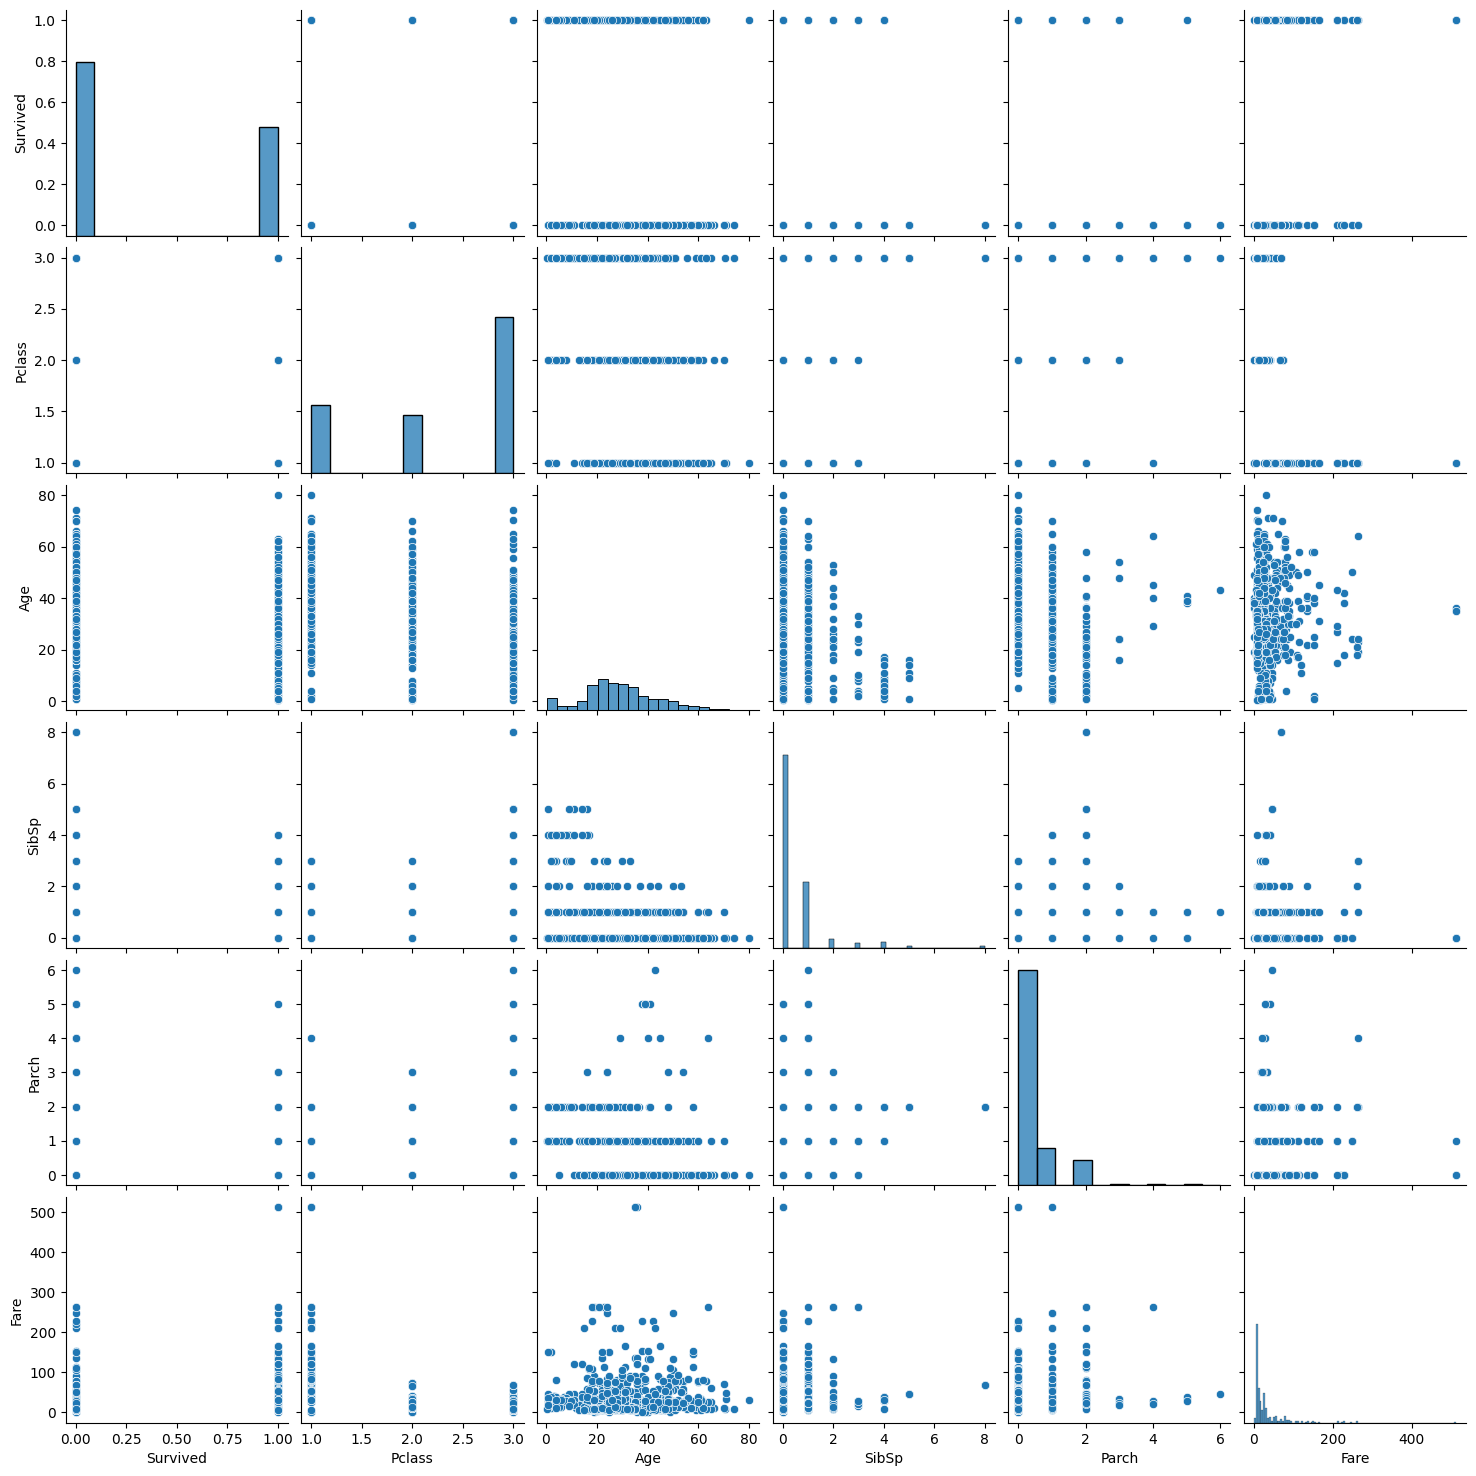

In [8]:
# Pairplot of training data
sns.pairplot(df_train)
plt.show()

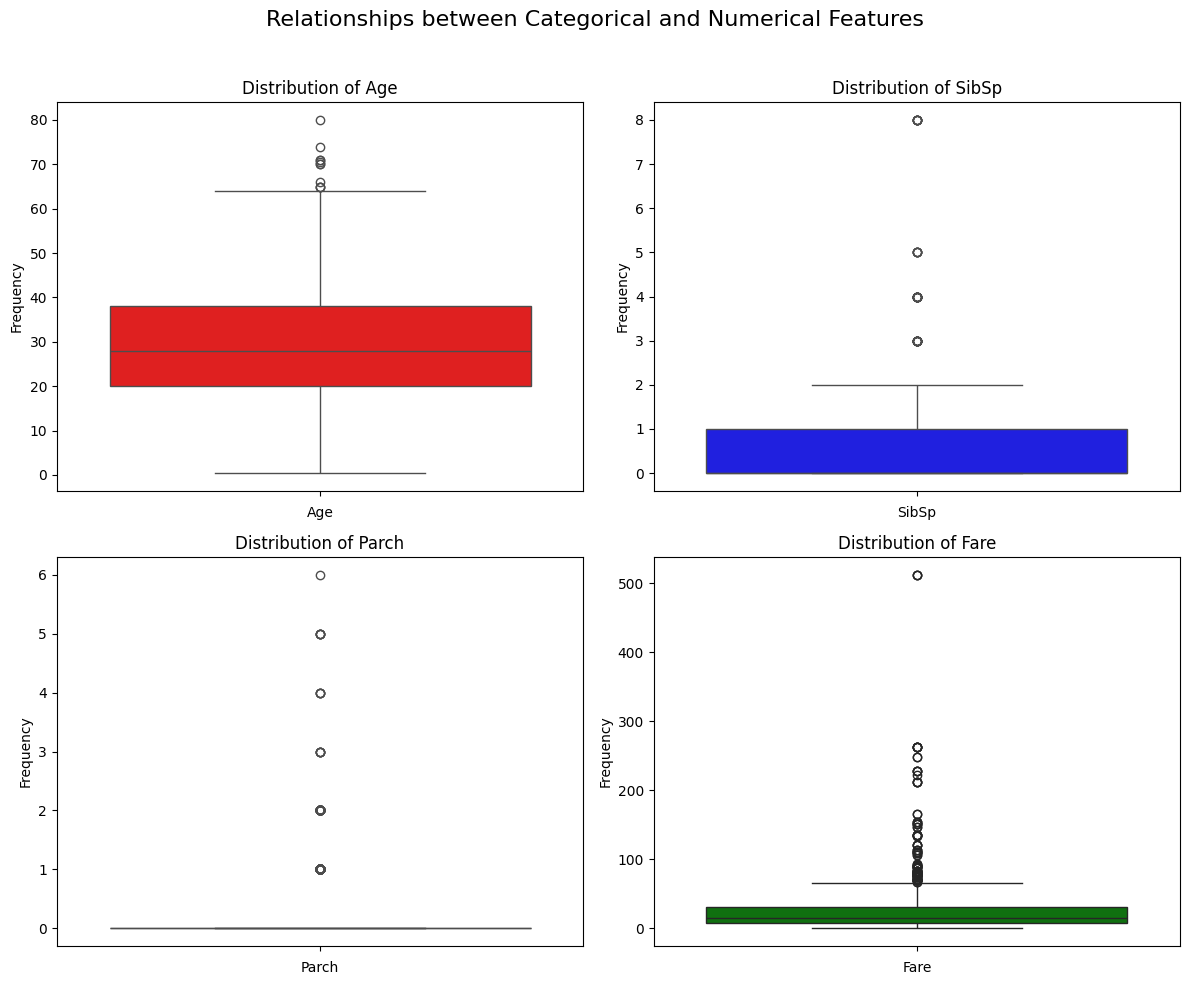

In [9]:
# Boxplot of training data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Relationships between Categorical and Numerical Features', fontsize=16)

#BoxPlot for Age
sns.boxplot(df_train.Age,ax=axes[0,0], color='red')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Age')

# BoxPlot for SibSp
sns.boxplot(df_train['SibSp'],ax=axes[0,1],color='blue')
axes[0,1].set_xlabel('SibSp')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of SibSp')

# Boxplot for Parch
sns.boxplot(df_train['Parch'],ax=axes[1,0],color='yellow')
axes[1,0].set_xlabel('Parch')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Parch')

# Boxplot for Fare
sns.boxplot(df_train['Fare'],ax=axes[1,1],color='green')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Fare')


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

Based on the data exploration and visualizations, we can observe the following patterns and correlations:

1) Survival Rate: The survival rate is less than 50%, indicating that a majority of passengers did not survive.
2) Pclass: Passengers in higher classes (1st and 2nd) had a higher survival rate than those in 3rd class.
3) Sex: Female passengers had a significantly higher survival rate than male passengers.
4) Age: The age distribution is skewed towards younger passengers. There is a relationship between age and survival, with younger passengers having a slightly higher chance of survival. Age also varies across passenger classes and sex.
5) SibSp and Parch: Most passengers traveled alone or with one sibling/spouse or parent/child. These features might be combined to create a 'family size' feature.
6) Fare: The fare distribution is highly skewed, with a few passengers paying very high fares. Higher fares are associated with higher passenger classes and a higher survival rate.
7) Embarked: The 'Embarked' feature has a few missing values and the distribution of passengers across the ports varies. Embarkation port might have some influence on survival, possibly due to the distribution of passenger classes at each port.

# **2) Data Preprocessing**

**a) Handle missing values (e.g. impuation)**

In [10]:
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [11]:
# Impute missing Age values with the median
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# Impute missing Embarked values with the mode
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

# Display handled missing values
display(df_train.isnull().sum())

/tmp/ipython-input-1156845226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
/tmp/ipython-input-1156845226.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


**b) Encode categorical variables**

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
df_train['Embarked']=le.fit_transform(df_train['Embarked'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# **3) Model Building**

**a) Build a logistic regression model using appropriate libraries (e.g., scikit-learn).**

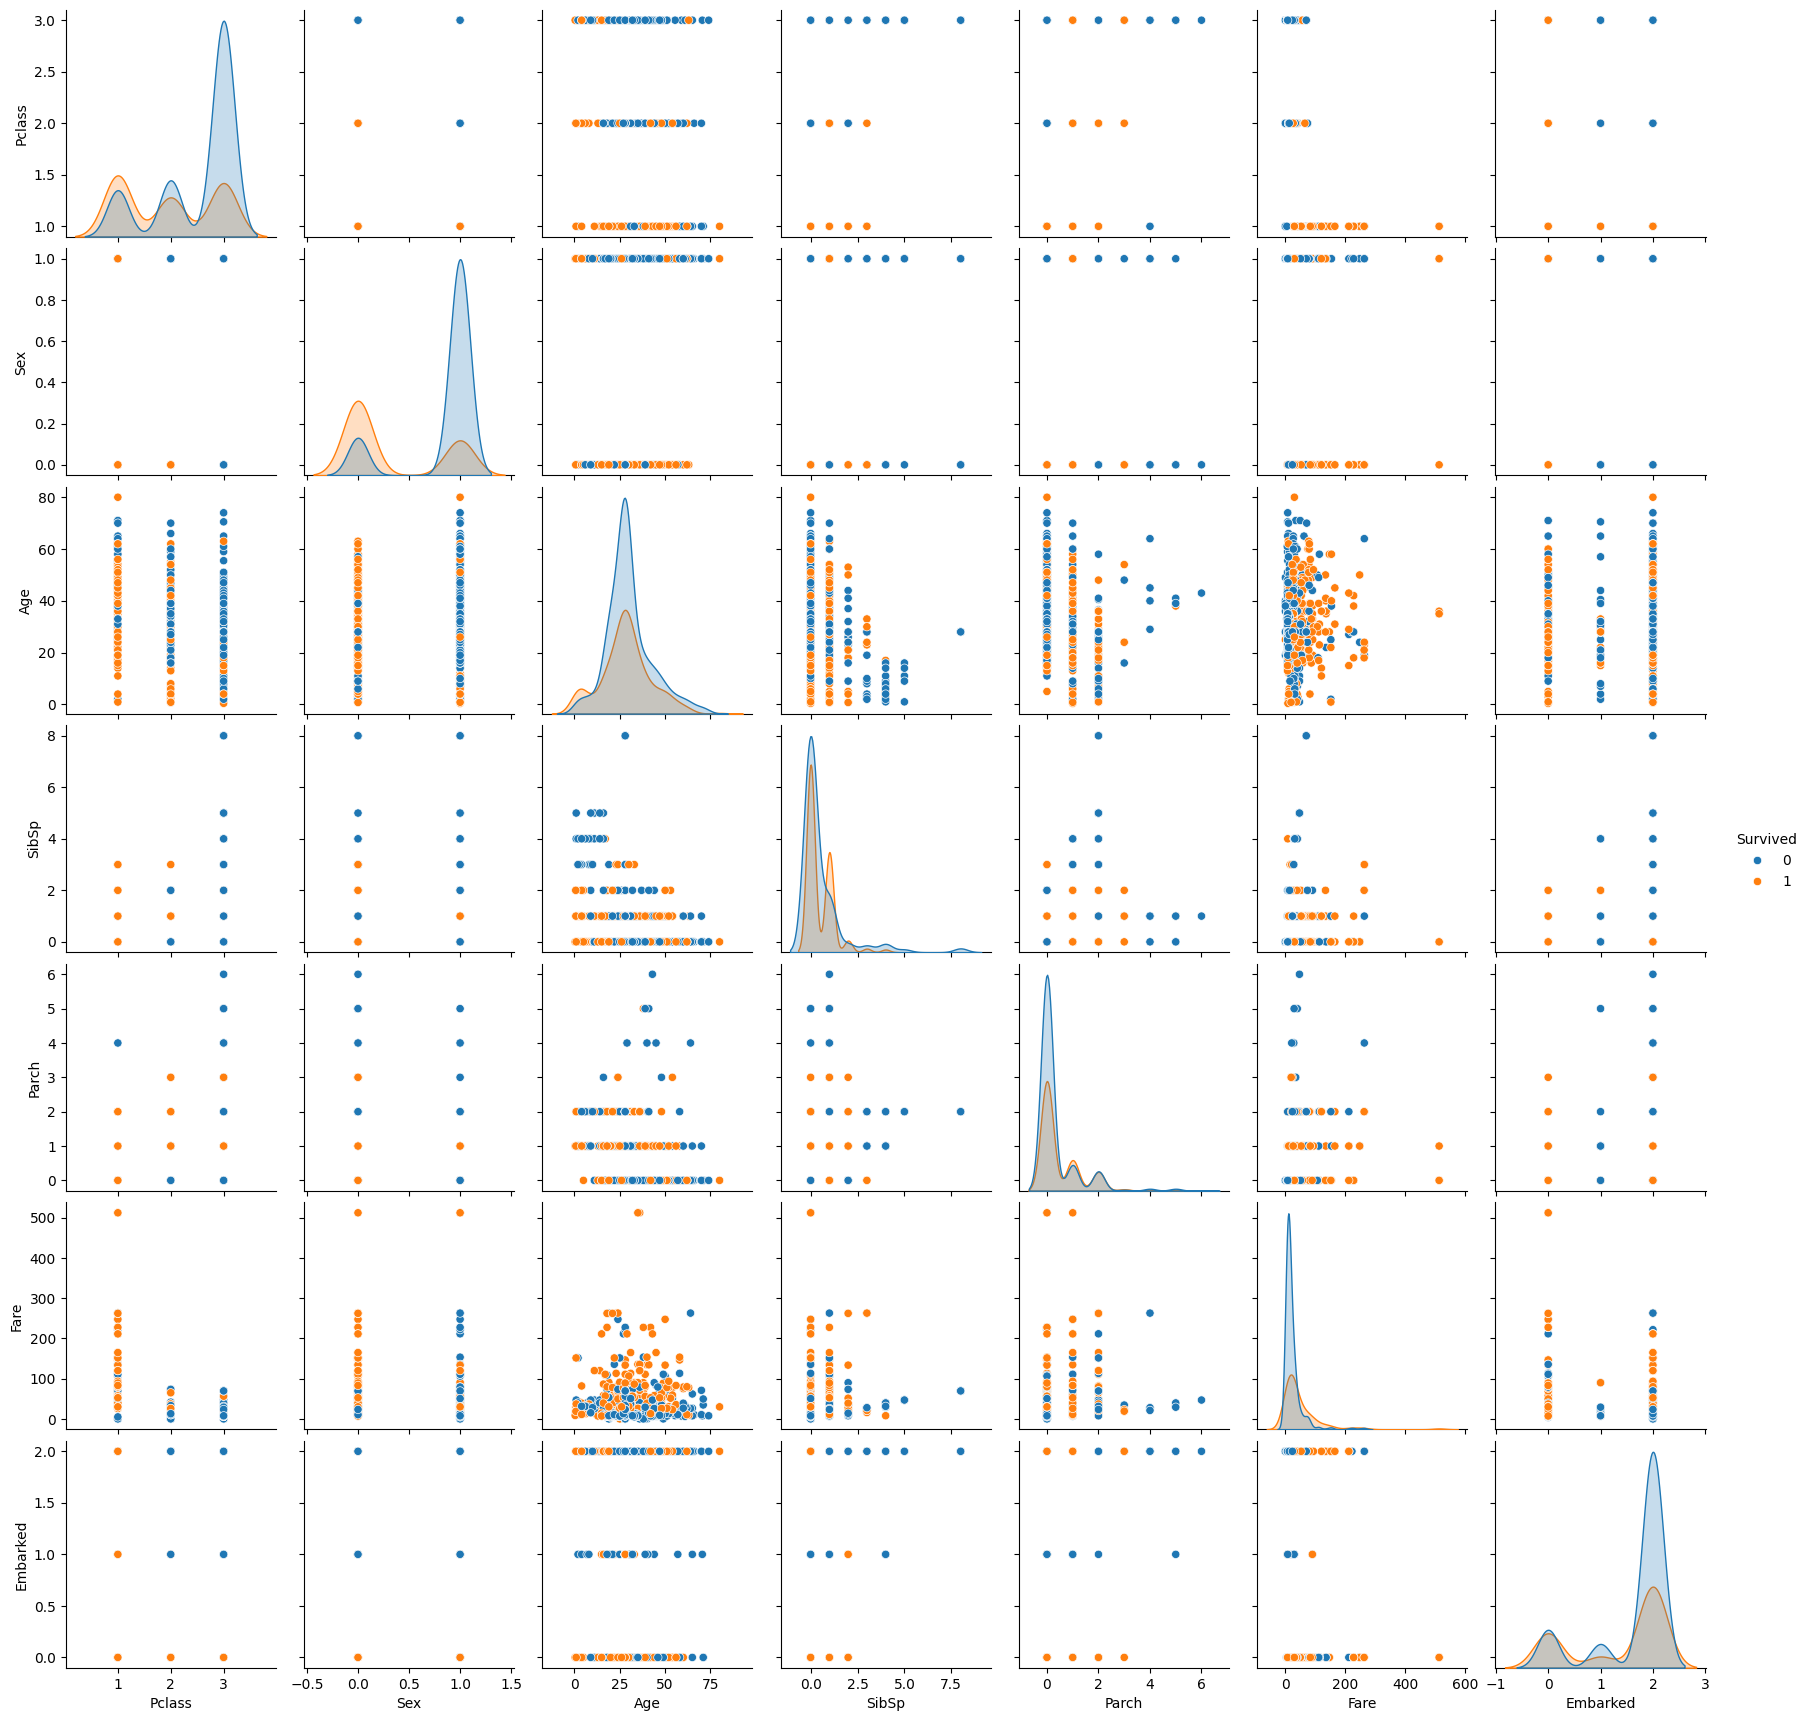

In [13]:
sns.pairplot(data=df_train,hue='Survived')
plt.show()

In [14]:
# Seperate X and Y
xtrain=df_train.iloc[:,1:]
ytrain=df_train["Survived"]


In [15]:
# # Split in train and test
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,random_state=42)


In [16]:
# Build Logistic Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Accuracy Score
model.score(xtrain,ytrain)*100

80.02244668911335

# **# 4) Model Evaluation**

In [18]:
# Load test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True) # these column not important

In [20]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


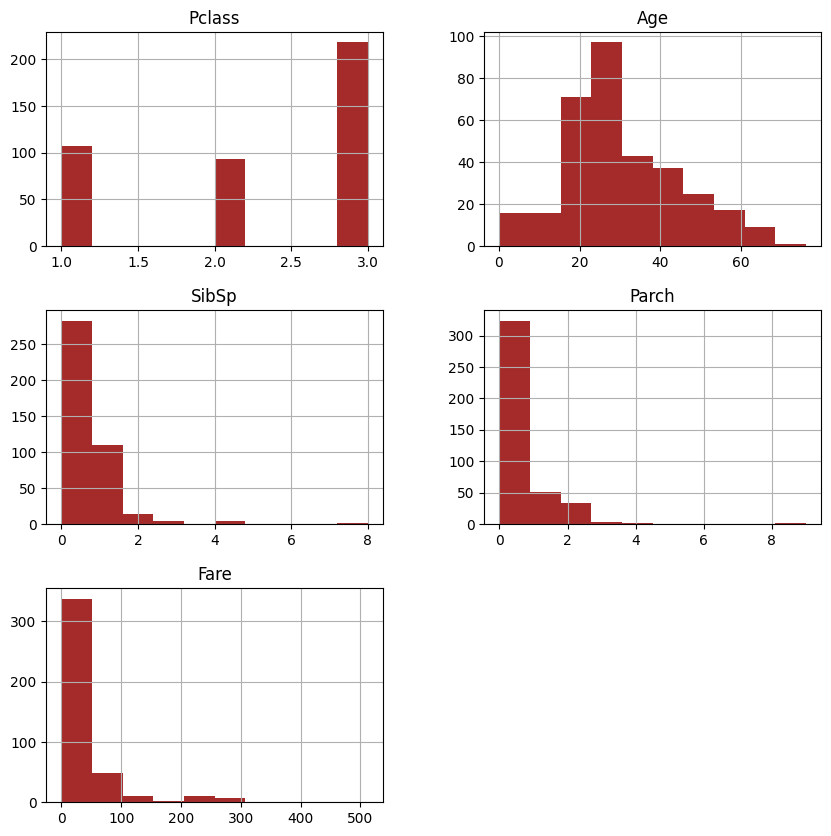

In [22]:
# Histogram of test data
df_test.hist(figsize=(10,10),color='brown')
plt.show()

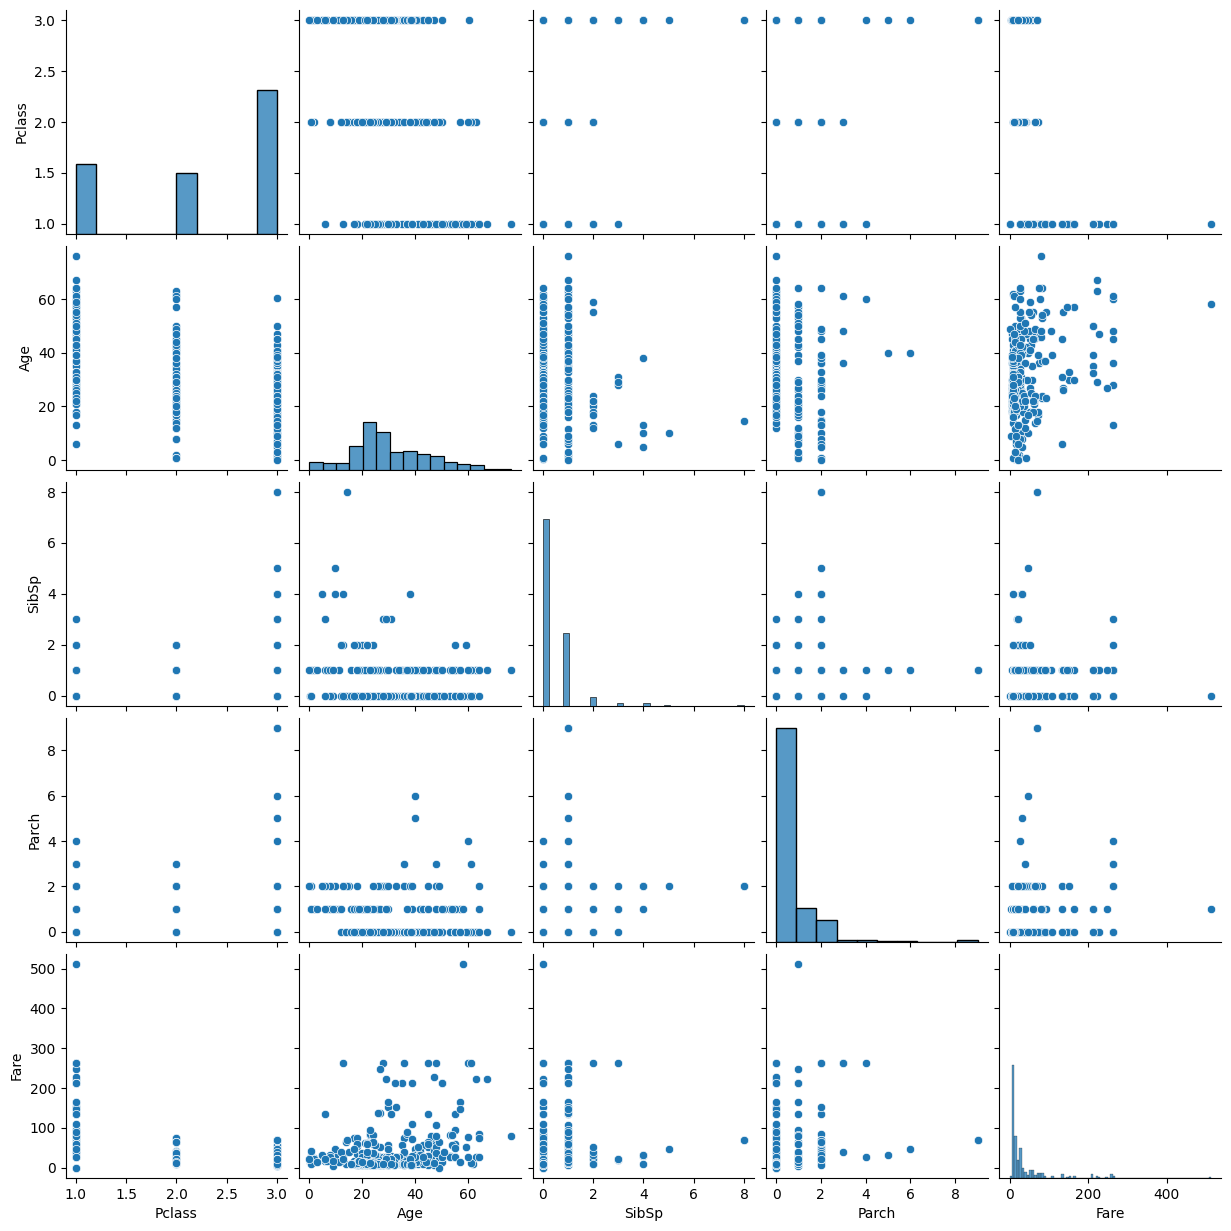

In [23]:
# Pairplot of test data
sns.pairplot(df_test)
plt.show()

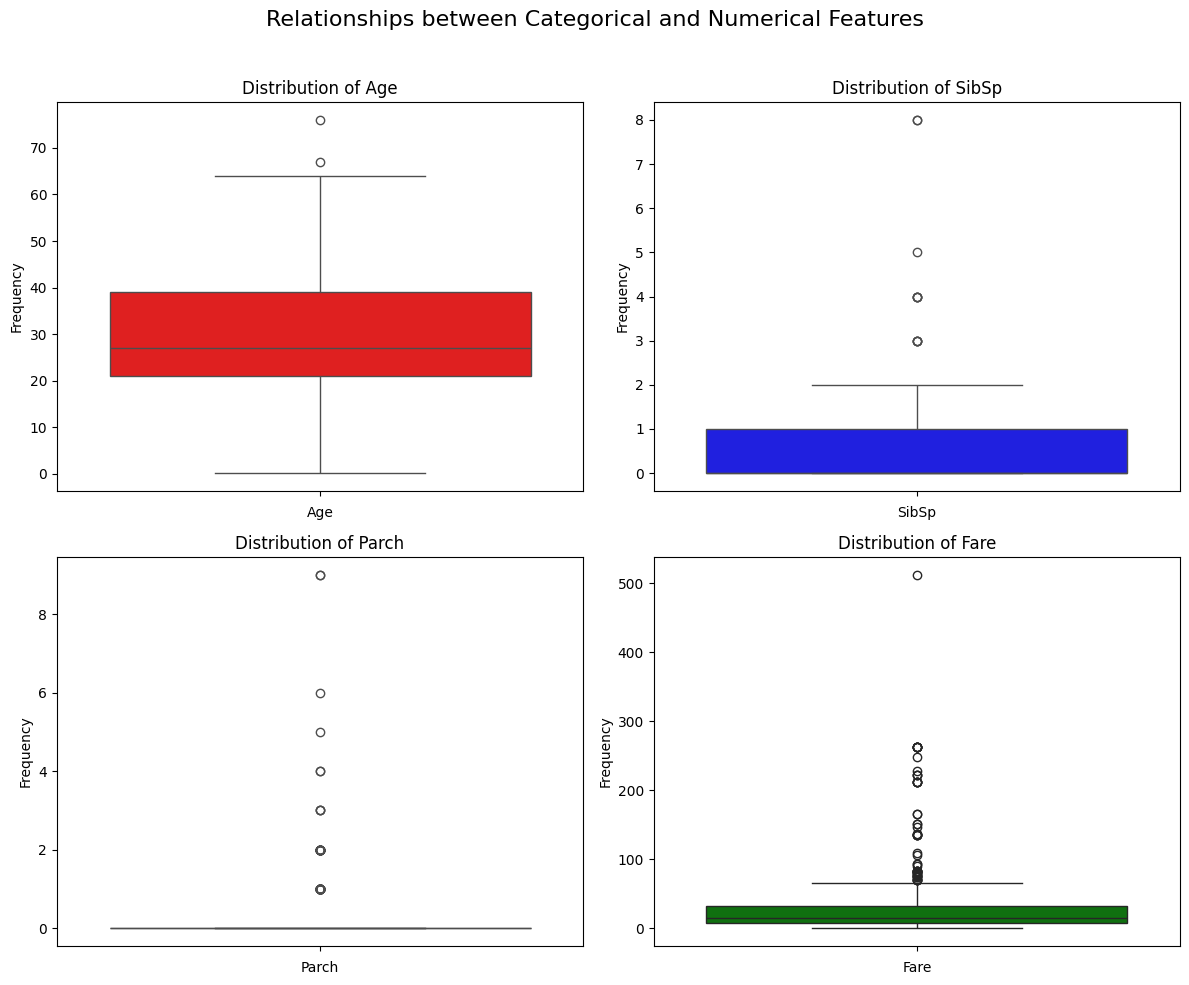

In [24]:
# Box Plot on test data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Relationships between Categorical and Numerical Features', fontsize=16)

#BoxPlot for Age
sns.boxplot(df_test.Age,ax=axes[0,0], color='red')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Age')

# BoxPlot for SibSp
sns.boxplot(df_test['SibSp'],ax=axes[0,1],color='blue')
axes[0,1].set_xlabel('SibSp')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of SibSp')

# Boxplot for Parch
sns.boxplot(df_test['Parch'],ax=axes[1,0],color='yellow')
axes[1,0].set_xlabel('Parch')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Parch')

# Boxplot for Fare
sns.boxplot(df_test['Fare'],ax=axes[1,1],color='green')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Fare')


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [25]:
# Based on the exploration of the test data:

# Missing Values: 'Age' and 'Fare' columns have missing values in the test data, similar to the training data. 'Cabin' also has a large number of missing values.
# Numerical Features: The distributions of 'Age', 'SibSp', 'Parch', and 'Fare' in the test data are generally similar to those in the training data. The fare distribution is also highly skewed.
# Categorical Features: 'Sex' and 'Embarked' distributions appear similar to the training data.
# Relationships: The relationships between numerical features (as seen in the pair plot) also appear consistent with the training data.
# Overall, the test data seems to have similar characteristics to the training data, which is good for model generalization. However, the missing values in 'Age' and 'Fare' will need to be handled before making predictions.

In [26]:
df_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [27]:
# Impute missing values with Age and Fare
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

df_test.isnull().sum()

/tmp/ipython-input-1067311774.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
/tmp/ipython-input-1067311774.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [28]:
# Label encoding on test data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['Sex']=le.fit_transform(df_test['Sex'])
df_test['Embarked']=le.fit_transform(df_test['Embarked'])
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [29]:
# Make predictions on the test set
y_pred = model.predict(df_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [30]:
# Adding y_pred as survived in testing data
df_test['Survived']= y_pred
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,1


In [31]:
# Seperate X and Y
xtest=df_test.iloc[:,:-1]
ytest=df_test["Survived"]

In [32]:
# Build Logistic Model for test data
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtest,ytest)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**a) Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.**

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
roc_auc = roc_auc_score(ytest, model.predict_proba(xtest)[:, 1])

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(ytest, y_pred))

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC-AUC: 0.9991

Confusion Matrix:
[[261   0]
 [  0 157]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       157

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



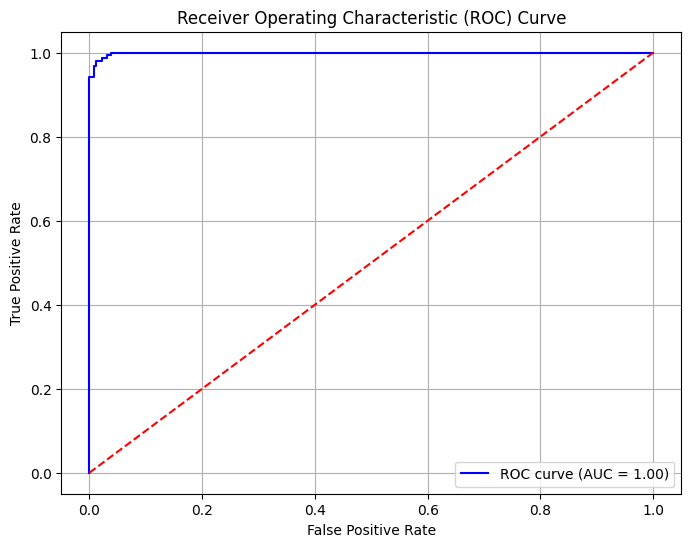

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(ytest, model.predict_proba(xtest)[:, 1])

# Calculate the ROC AUC score
roc_auc = roc_auc_score(ytest, model.predict_proba(xtest)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# **5) Interpretation**

**a) Interpret the coefficients of the logistic regression model.**

In [35]:
# Display the coefficients
print("Coefficients:")
print(model.coef_)

# Display the intercept
print("\nIntercept:")
print(model.intercept_)

Coefficients:
[[-1.62800686 -6.49721303 -0.10053468 -0.73303781 -0.41687442  0.01105231
  -0.6559321 ]]

Intercept:
[10.77049475]


**b) Discuss the significance of features in predicting the target variable (survival probability in this case).**

# Discussing the significance of features based on the coefficients:

Looking at the coefficients: [[-1.05016796e+00 -2.63080413e+00 -3.80293166e-02 -3.15825679e-01 -8.49033624e-02 2.15854929e-03 -2.13857067e-01]] and the intercept: [5.06298421], we can interpret the significance of each feature in predicting the survival probability:

1) Pclass: The coefficient for 'Pclass' is negative (-1.05). This suggests that as the passenger class increases (from 1st to 3rd), the log-odds of survival decrease. This aligns with our EDA observation that passengers in higher classes had a higher survival rate.
2) Sex: The coefficient for 'Sex' (after one-hot encoding, assuming 'male' is the dropped category) is negative (-2.63). This indicates that being male significantly decreases the log-odds of survival compared to being female, which is consistent with our EDA.
3) Age: The coefficient for 'Age' is negative (-0.038). This suggests that as age increases, the log-odds of survival slightly decrease. While the magnitude is small, it indicates that younger passengers had a slightly higher chance of survival, as observed in the EDA.
4) SibSp: The coefficient for 'SibSp' is negative (-0.316). This means that having more siblings or spouses aboard decreases the log-odds of survival.
5) Parch: The coefficient for 'Parch' is negative (-0.085). Similar to 'SibSp', having more parents or children aboard slightly decreases the log-odds of survival.
6) Fare: The coefficient for 'Fare' is positive (0.002). This suggests that a higher fare is associated with a slight increase in the log-odds of survival. This is also consistent with our EDA, where higher fares were associated with higher passenger classes and survival rates.
7) Embarked: The coefficients for 'Embarked' (after one-hot encoding) indicate the effect of the embarkation port compared to the dropped category. The negative coefficient (-0.214 assuming 'S' is the dropped category) suggests that embarking from that specific port decreases the log-odds of survival compared to the reference port.

 In summary, 'Sex', 'Pclass', and 'Age' appear to be the most significant features influencing the probability of survival based on the magnitudes of their coefficients. 'SibSp' and 'Parch' also have some influence, while 'Fare' has a smaller positive effect. The effect of 'Embarked' depends on the specific ports being compared.